In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


What is the difference between bagging and random forest .
First differnce we know that the base estimator will be decision tree instead of any base estimator which will be in bagging . Bagging has a option of selecting base estimator but in random forest there in no option to select base estimator . 


In [ ]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X.shape

(500, 2)

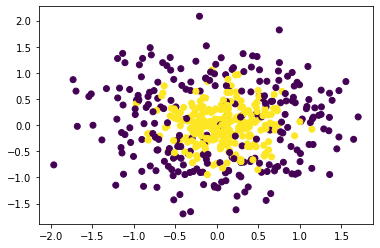

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

# **Implementing Decision tree**

To show random forest performs better than decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

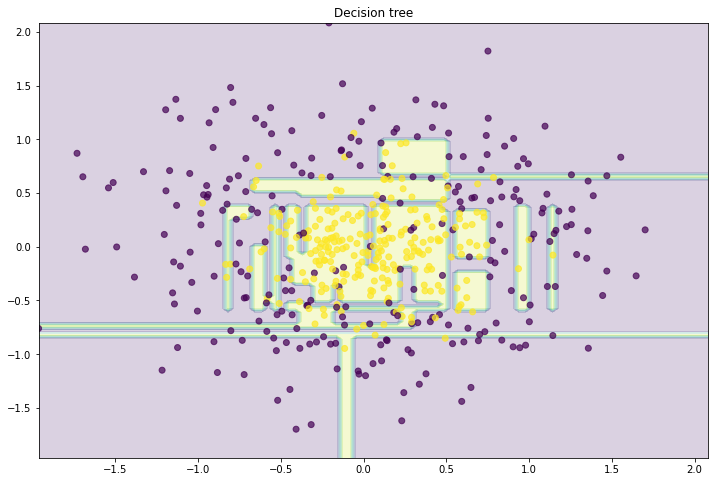

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

# **Implementing Random Forest**



In [ ]:
from sklearn.ensemble import RandomForestClassifier

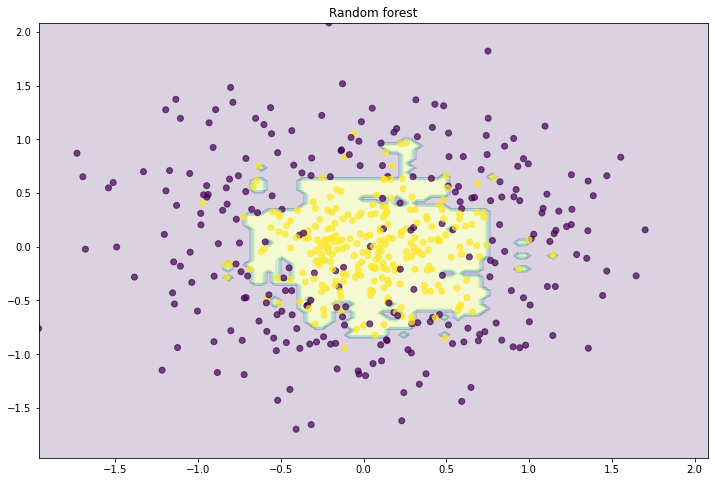

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

As you can little bit of bias is increased but variance is dropped highly 
So we can say that random forest helps to reduce high variance . 

In [ ]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

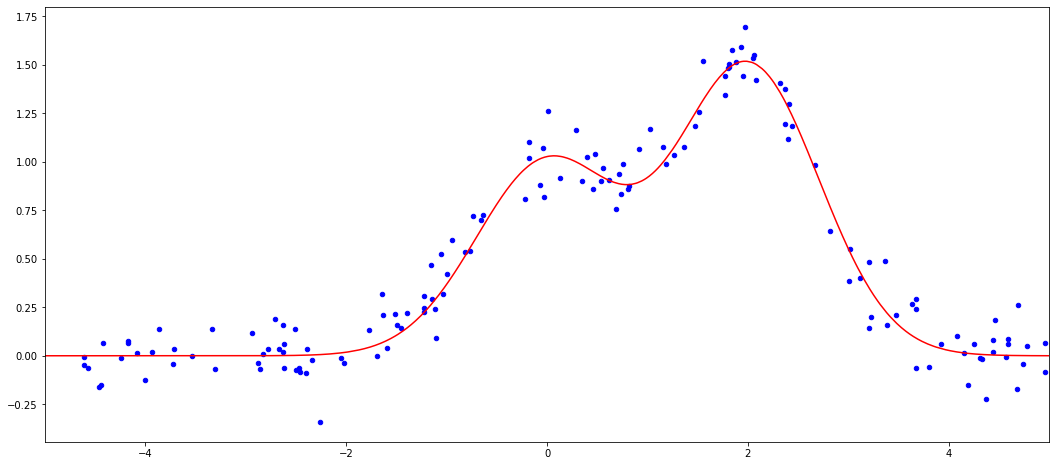

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 22.70')

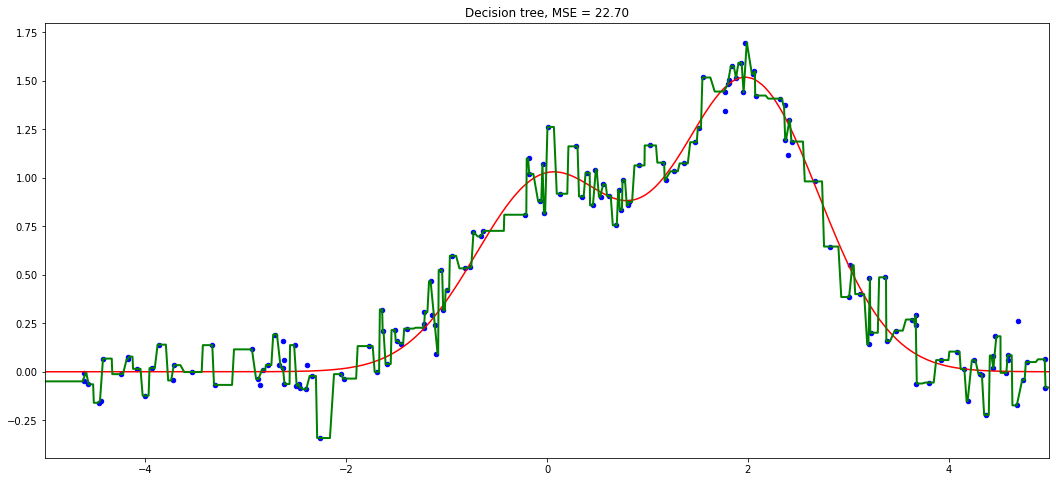

In [ ]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

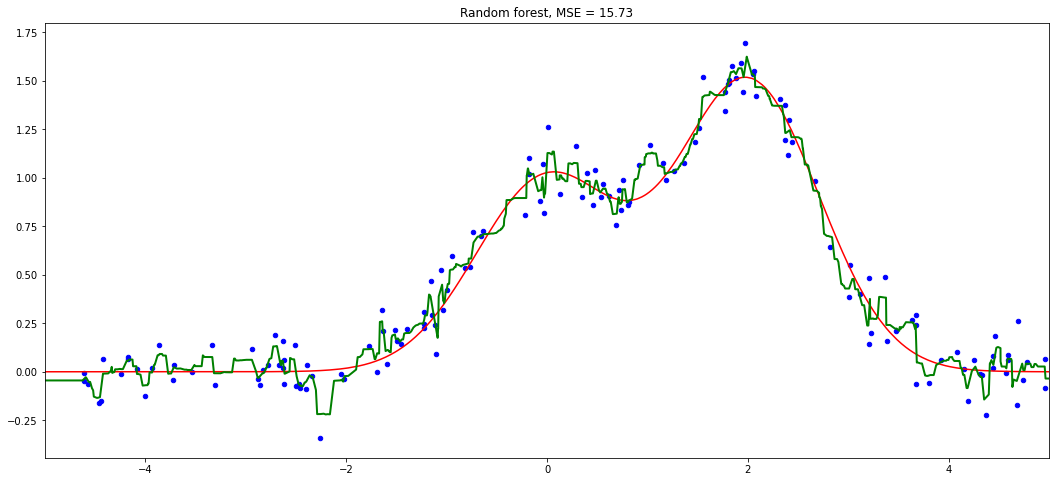

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));


Second major differnce is in bagging feature sampling happens at tree level but in random forest column sampling happens at node level . To illustrate this lets take a example .


## ***Bagging VS Random Forest***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [ ]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.607679,-2.411609,0.321369,-0.567919,-1.484609,0
1,-0.984358,-1.727335,0.309139,-0.704603,-0.478392,1
2,0.747746,1.860214,-1.611728,-0.585334,0.494498,0
3,-2.082502,-0.890111,-0.789985,-0.616204,-0.614566,1
4,0.753670,0.196659,-1.651553,-0.314009,-2.390899,1


In [ ]:
bag = BaggingClassifier(max_features=2)

In [ ]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

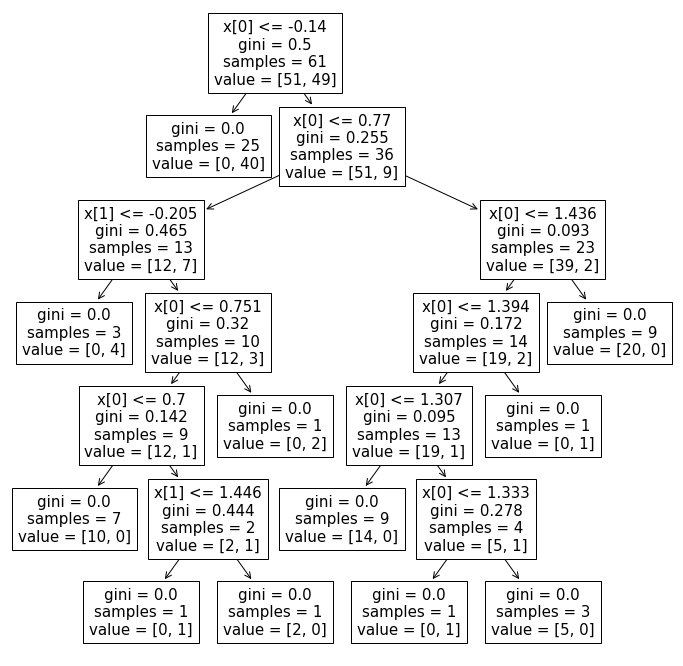

In [ ]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()
#as you can see only two columns were in the whole tree

In [ ]:
rf = RandomForestClassifier(max_features=2)

In [ ]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])


RandomForestClassifier(max_features=2)

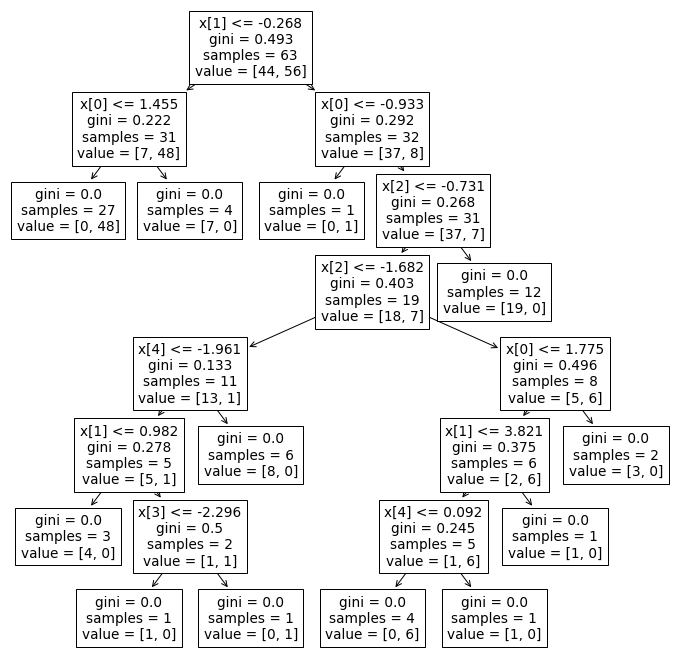

In [ ]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()
#as you can see all the columns where envolved in this splits 